In [1]:
import pickle
import nimfa
import pandas as pd
import numpy as np
import scipy as sp
import scanpy as sc
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
adata = sc.read('data/iPS/log_normalised_counts.csv')
adata = adata.transpose()
cell_stages = pd.read_csv('data/iPS/cell_diff_stages.tsv', sep = '\t', index_col = 0)
cell_stages = cell_stages.sort_index()
cell_stages = cell_stages.set_index('cell')
adata.obs['cell_differentiation'] = cell_stages['cell_differentiation']
adata.obs['pseudotime'] = cell_stages['pseudo']
adata.obs['day'] = cell_stages['day']

In [3]:
with open('results/nmf_ips.pickle', 'rb') as f:
    nmf_ips = pickle.load(f)

with open('results/nmf_defendo.pickle', 'rb') as f:
    nmf_d = pickle.load(f)

with open('results/nmf_mesendo.pickle', 'rb') as f:
    nmf_m = pickle.load(f)

In [ ]:
def min_max_scale

In [4]:
factor_ips_norm = nmf_ips.coef()

In [8]:
def min_max_norm(arr, axis = None):
    armin = np.min(arr, axis = axis)
    armax = np.max(arr, axis = axis)
    return (arr - armin) / (armax - armin)

In [12]:
factor_ips_norm = min_max_norm(nmf_ips.coef(), axis = 1)
factor_d_norm = min_max_norm(nmf_d.coef(), axis = 1)
factor_m_norm = min_max_norm(nmf_m.coef(), axis = 1)

Text(50.722222222222214, 0.5, 'Gene')

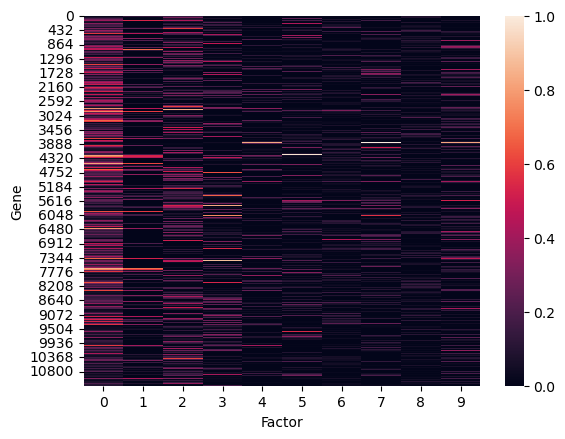

In [13]:
sns.heatmap(factor_ips_norm.T)
plt.xlabel("Factor")
plt.ylabel("Gene")

Text(50.722222222222214, 0.5, 'Gene')

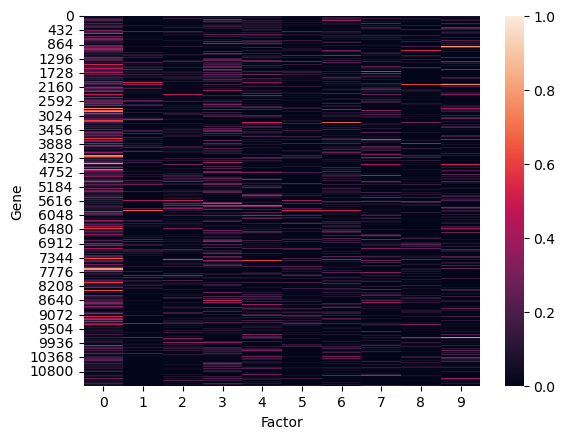

In [14]:
sns.heatmap(factor_d_norm.T)
plt.xlabel("Factor")
plt.ylabel("Gene")

Text(50.722222222222214, 0.5, 'Gene')

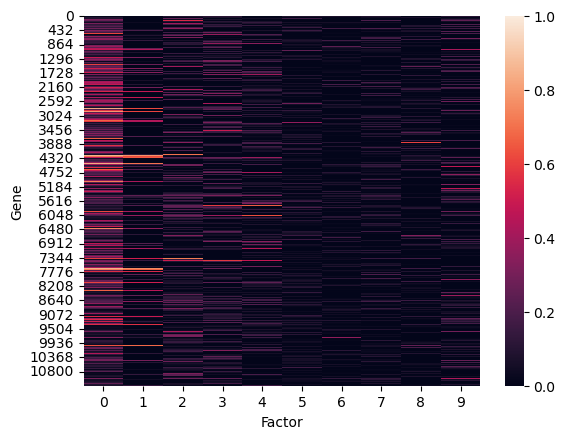

In [15]:
sns.heatmap(factor_m_norm.T)
plt.xlabel("Factor")
plt.ylabel("Gene")

In [24]:
def pairwise_cor(mat1, mat2):
    return [[sp.stats.pearsonr(np.ravel(mat1[i]), np.ravel(mat2[j]))[0] for i in range(mat1.shape[0])] for j in range(mat2.shape[0])]

Text(0.5, 23.52222222222222, 'iPS')

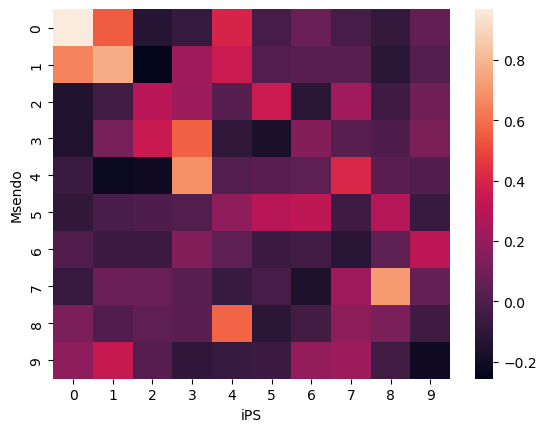

In [26]:
# pearson correlation of factors
ips_m_cor = pairwise_cor(nmf_ips.coef(), nmf_m.coef())
sns.heatmap(ips_m_cor)
plt.ylabel("Msendo")
plt.xlabel("iPS")

Text(0.5, 23.52222222222222, 'Msendo')

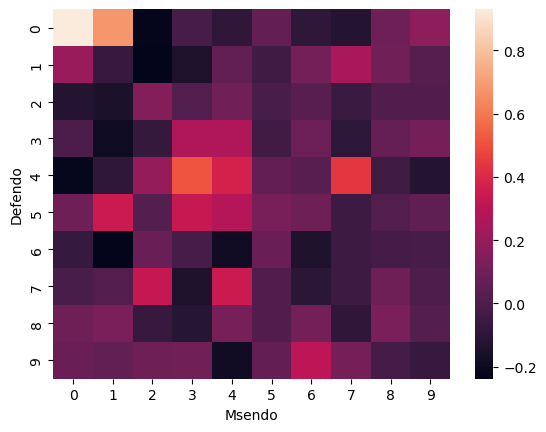

In [27]:
m_d_cor = pairwise_cor(nmf_m.coef(), nmf_d.coef())
sns.heatmap(m_d_cor)
plt.ylabel("Defendo")
plt.xlabel("Msendo")

/tmp/ipykernel_102752/304491696.py:16: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Y = sch.linkage(C, method='average')


RecursionError: maximum recursion depth exceeded while calling a Python object

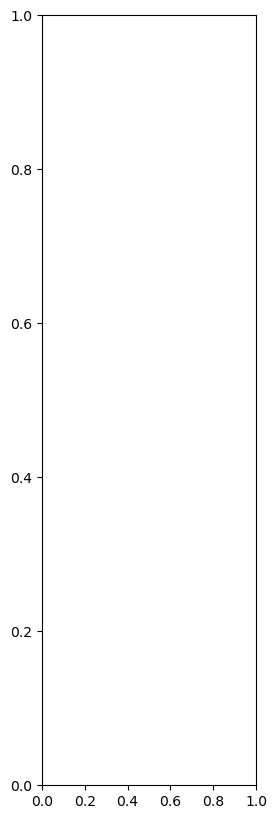

In [29]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.gridspec as gridspec
from sklearn import preprocessing
import scipy.cluster.hierarchy as sch

def clean_axis(ax):
    ax.get_xaxis().set_ticks([])
    ax.get_yaxis().set_ticks([])
    for sp in ax.spines.values():
        sp.set_visible(False)


C = 1 - nmf_ips.fit.consensus()
Y = sch.linkage(C, method='average')



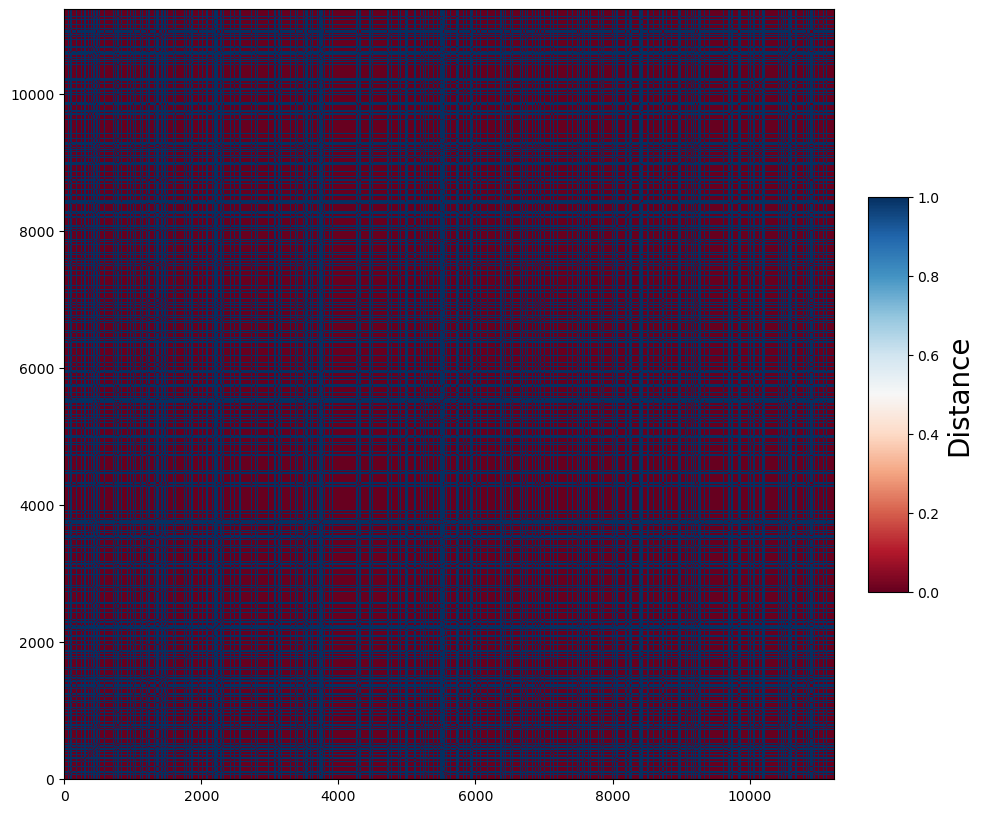

In [34]:
fig = plt.figure(figsize=(13.9, 10))
heatmapGS = gridspec.GridSpec(1, 2, wspace=.01, hspace=0., width_ratios=[0.25,1])
heatmapAX = fig.add_subplot(heatmapGS[0,1])
axi = heatmapAX.imshow(C, interpolation='nearest', aspect='equal', origin='lower', cmap='RdBu') 
cb = fig.colorbar(axi, fraction=0.046, pad=0.04, aspect=10) 
cb.set_label('Distance', fontsize=20)

NameError: name 'denD' is not defined

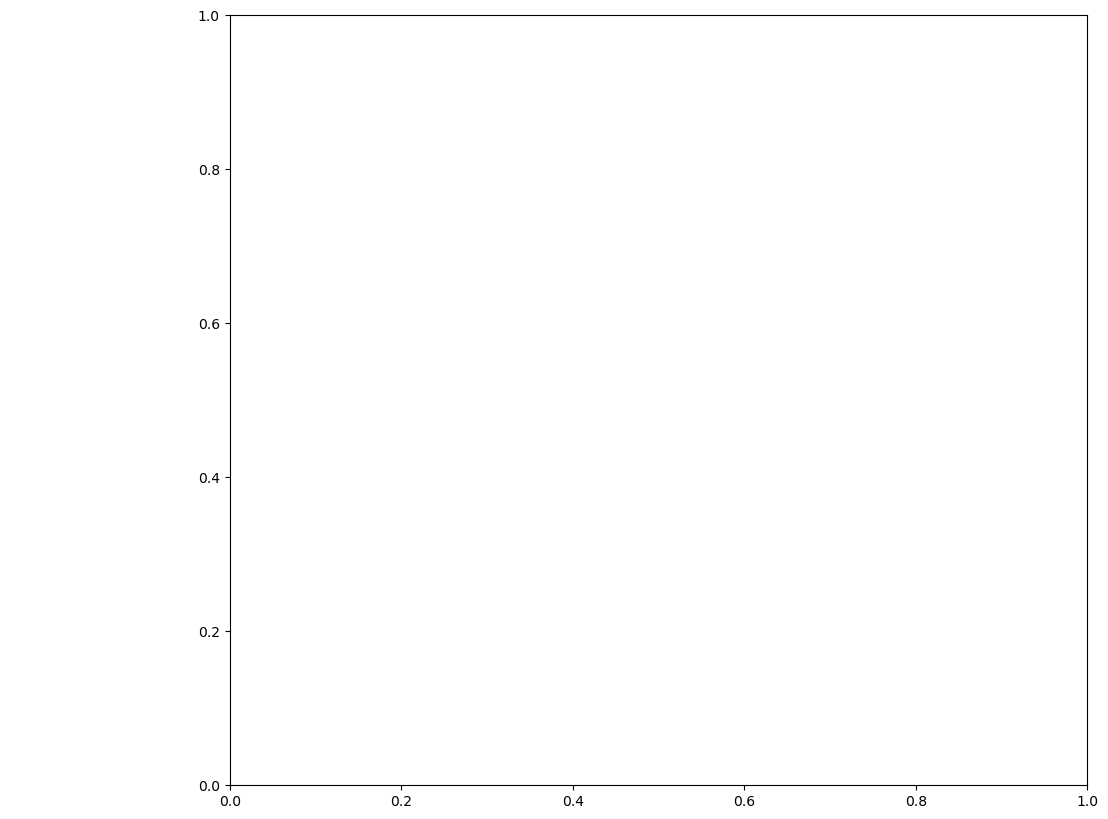

In [30]:

denAX = fig.add_subplot(heatmapGS[0,0])
clean_axis(denAX)


D = C[denD['leaves'], :][:, denD['leaves']]

clean_axis(heatmapAX)

